In [6]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

In [7]:
def pythag(pt1, pt2):
    a_sq = (pt2[0] - pt1[0]) ** 2
    b_sq = (pt2[1] - pt1[1]) ** 2
    return sqrt(a_sq + b_sq)

In [8]:
def regression_ceof(pts):
    X = np.array([pt[0] for pt in pts]).reshape(-1, 1)
    y = np.array([pt[1] for pt in pts])
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0], model.intercept_

In [9]:
def local_min_max(pts):
    local_min = []
    local_max = []
    prev_pts = [(0, pts[0]), (1, pts[1])]
    for i in range(1, len(pts) - 1):
        append_to = ''
        if pts[i-1] > pts[i] < pts[i+1]:
            append_to = 'min'
        elif pts[i-1] < pts[i] > pts[i+1]:
            append_to = 'max'
        if append_to:
            if local_min or local_max:
                prev_distance = pythag(prev_pts[0], prev_pts[1]) * 0.5
                curr_distance = pythag(prev_pts[1], (i, pts[i]))
                if curr_distance >= prev_distance:
                    prev_pts[0] = prev_pts[1]
                    prev_pts[1] = (i, pts[i])
                    if append_to == 'min':
                        local_min.append((i, pts[i]))
                    else:
                        local_max.append((i, pts[i]))
            else:
                prev_pts[0] = prev_pts[1]
                prev_pts[1] = (i, pts[i])
                if append_to == 'min':
                    local_min.append((i, pts[i]))
                else:
                    local_max.append((i, pts[i]))
    return local_min, local_max

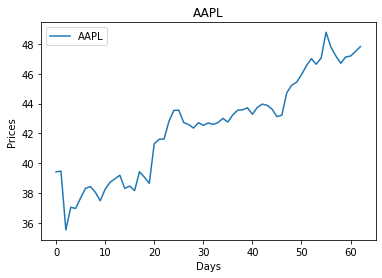

In [12]:
df = pd.read_csv("AAPL.csv")
series = df['Close']
# symbol = 'AAPL'
# df = web.DataReader(symbol, 'yahoo', '2019-01-01', '2019-04-01')
series = df['Close']
series.index = np.arange(series.shape[0])
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(series, label=symbol)
plt.legend()

In [13]:
month_diff = series.shape[0] // 30
if month_diff == 0:
    month_diff = 1
month_diff

2

In [14]:
smooth = int(2 * month_diff + 3)
smooth

7

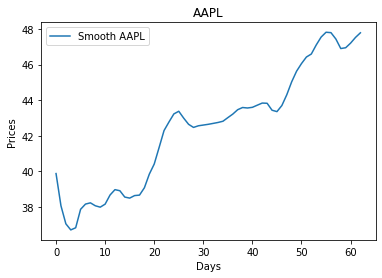

In [15]:
pts = savgol_filter(series, smooth, 3)
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(pts, label=f'Smooth {symbol}')
plt.legend()

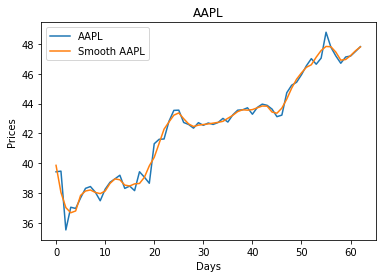

In [16]:
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(series, label=symbol)
plt.plot(pts, label=f'Smooth {symbol}')
plt.legend()

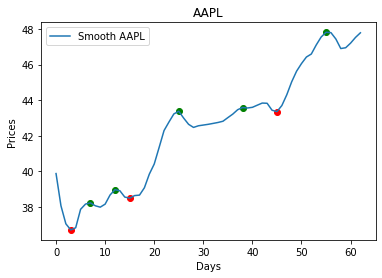

In [17]:
local_min, local_max = local_min_max(pts)
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(pts, label=f'Smooth {symbol}')
for pt in local_min:
    plt.scatter(pt[0], pt[1], c='r')
for pt in local_max:
    plt.scatter(pt[0], pt[1], c='g')
plt.legend()

In [18]:
local_min_slope, local_min_int = regression_ceof(local_min)
local_max_slope, local_max_int = regression_ceof(local_max)
support = (local_min_slope * np.array(series.index)) + local_min_int
resistance = (local_max_slope * np.array(series.index)) + local_max_int

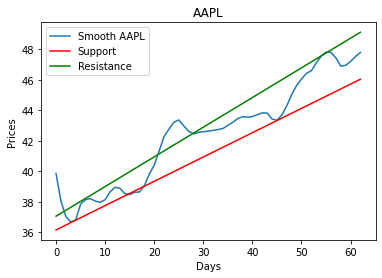

In [19]:
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(pts, label=f'Smooth {symbol}')
plt.plot(support, label='Support', c='r')
plt.plot(resistance, label='Resistance', c='g')
plt.legend()

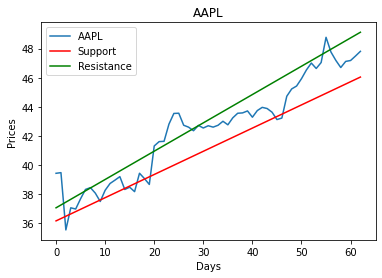

In [20]:
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(series, label=symbol)
plt.plot(support, label='Support', c='r')
plt.plot(resistance, label='Resistance', c='g')
plt.legend()

In [21]:
support

array([36.16768348, 36.32696234, 36.48624119, 36.64552005, 36.80479891,
       36.96407777, 37.12335663, 37.28263548, 37.44191434, 37.6011932 ,
       37.76047206, 37.91975091, 38.07902977, 38.23830863, 38.39758749,
       38.55686635, 38.7161452 , 38.87542406, 39.03470292, 39.19398178,
       39.35326063, 39.51253949, 39.67181835, 39.83109721, 39.99037607,
       40.14965492, 40.30893378, 40.46821264, 40.6274915 , 40.78677035,
       40.94604921, 41.10532807, 41.26460693, 41.42388579, 41.58316464,
       41.7424435 , 41.90172236, 42.06100122, 42.22028007, 42.37955893,
       42.53883779, 42.69811665, 42.8573955 , 43.01667436, 43.17595322,
       43.33523208, 43.49451094, 43.65378979, 43.81306865, 43.97234751,
       44.13162637, 44.29090522, 44.45018408, 44.60946294, 44.7687418 ,
       44.92802066, 45.08729951, 45.24657837, 45.40585723, 45.56513609,
       45.72441494, 45.8836938 , 46.04297266])

In [22]:
resistance

array([37.06555575, 37.2599889 , 37.45442204, 37.64885519, 37.84328834,
       38.03772148, 38.23215463, 38.42658778, 38.62102092, 38.81545407,
       39.00988721, 39.20432036, 39.39875351, 39.59318665, 39.7876198 ,
       39.98205295, 40.17648609, 40.37091924, 40.56535239, 40.75978553,
       40.95421868, 41.14865183, 41.34308497, 41.53751812, 41.73195126,
       41.92638441, 42.12081756, 42.3152507 , 42.50968385, 42.704117  ,
       42.89855014, 43.09298329, 43.28741644, 43.48184958, 43.67628273,
       43.87071587, 44.06514902, 44.25958217, 44.45401531, 44.64844846,
       44.84288161, 45.03731475, 45.2317479 , 45.42618105, 45.62061419,
       45.81504734, 46.00948048, 46.20391363, 46.39834678, 46.59277992,
       46.78721307, 46.98164622, 47.17607936, 47.37051251, 47.56494566,
       47.7593788 , 47.95381195, 48.14824509, 48.34267824, 48.53711139,
       48.73154453, 48.92597768, 49.12041083])